In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../../

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Milan

/home/zzw/Code/milan/Spatio-Temporal-Analysis-Telecom-Italia


In [3]:
## prepare data
sms_milan = Milan(time_range='all', aggr_time='hour', tele_column='sms', grid_range=None)
sms_milan.prepare_data()
sms_milan.setup()
sms_milan_train = np.concatenate((sms_milan.milan_train, sms_milan.milan_val), axis=0)
sms_milan_test = sms_milan.milan_test
sms_milan_data = np.concatenate((sms_milan_train, sms_milan_test), axis=0)

loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-01.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-02.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-03.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-04.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-05.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-06.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-07.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-08.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-09.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-10.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-11.csv
loading data from file: data/sms-call-internet-mi/sms-

In [6]:
sms_milan_data[-1][0]

array([4.01638317e+00, 4.06134510e+00, 4.10920477e+00, 3.88615155e+00,
       3.67881632e+00, 4.10920477e+00, 4.10920477e+00, 4.10920477e+00,
       4.10920477e+00, 3.28786731e+00, 2.18032217e+00, 1.17309034e+00,
       6.25487030e-01, 1.12641120e+00, 1.11683643e+00, 1.24534845e+00,
       1.33892190e+00, 1.33892190e+00, 1.33892190e+00, 1.33892190e+00,
       1.33892190e+00, 1.33892190e+00, 1.34943330e+00, 1.42544901e+00,
       1.42761779e+00, 1.42761779e+00, 1.43696463e+00, 1.50037909e+00,
       1.68521047e+00, 1.78531229e+00, 1.80596375e+00, 1.72920871e+00,
       1.66162384e+00, 1.97775066e+00, 2.14174891e+00, 2.14174891e+00,
       2.14174891e+00, 2.14174891e+00, 2.61785126e+00, 2.56525564e+00,
       3.33148670e+00, 5.88344479e+00, 4.26353693e+00, 1.87451482e+00,
       1.87451482e+00, 1.87451482e+00, 1.50158424e+01, 2.36730003e+01,
       1.03987455e+01, 5.43046570e+00, 4.98264456e+00, 5.38130999e+00,
       4.98661900e+00, 5.53136921e+00, 4.34014416e+00, 3.35430455e+00,
      

In [7]:
## prepare data
sms_milan2 = Milan(time_range='all', aggr_time='hour', tele_column='sms', grid_range=None, compare_mvstgn=True)
sms_milan2.prepare_data()
sms_milan2.setup()
sms_milan_train2 = np.concatenate((sms_milan2.milan_train, sms_milan2.milan_val), axis=0)
sms_milan_test2 = sms_milan2.milan_test
sms_milan_data2 = np.concatenate((sms_milan_train2, sms_milan_test2), axis=0)

train shape: (1152, 100, 100), val shape: (168, 100, 100), test shape: (168, 100, 100)


In [8]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(sms_milan_data.ravel(), sms_milan_data2.ravel())

0.0014601336279002597

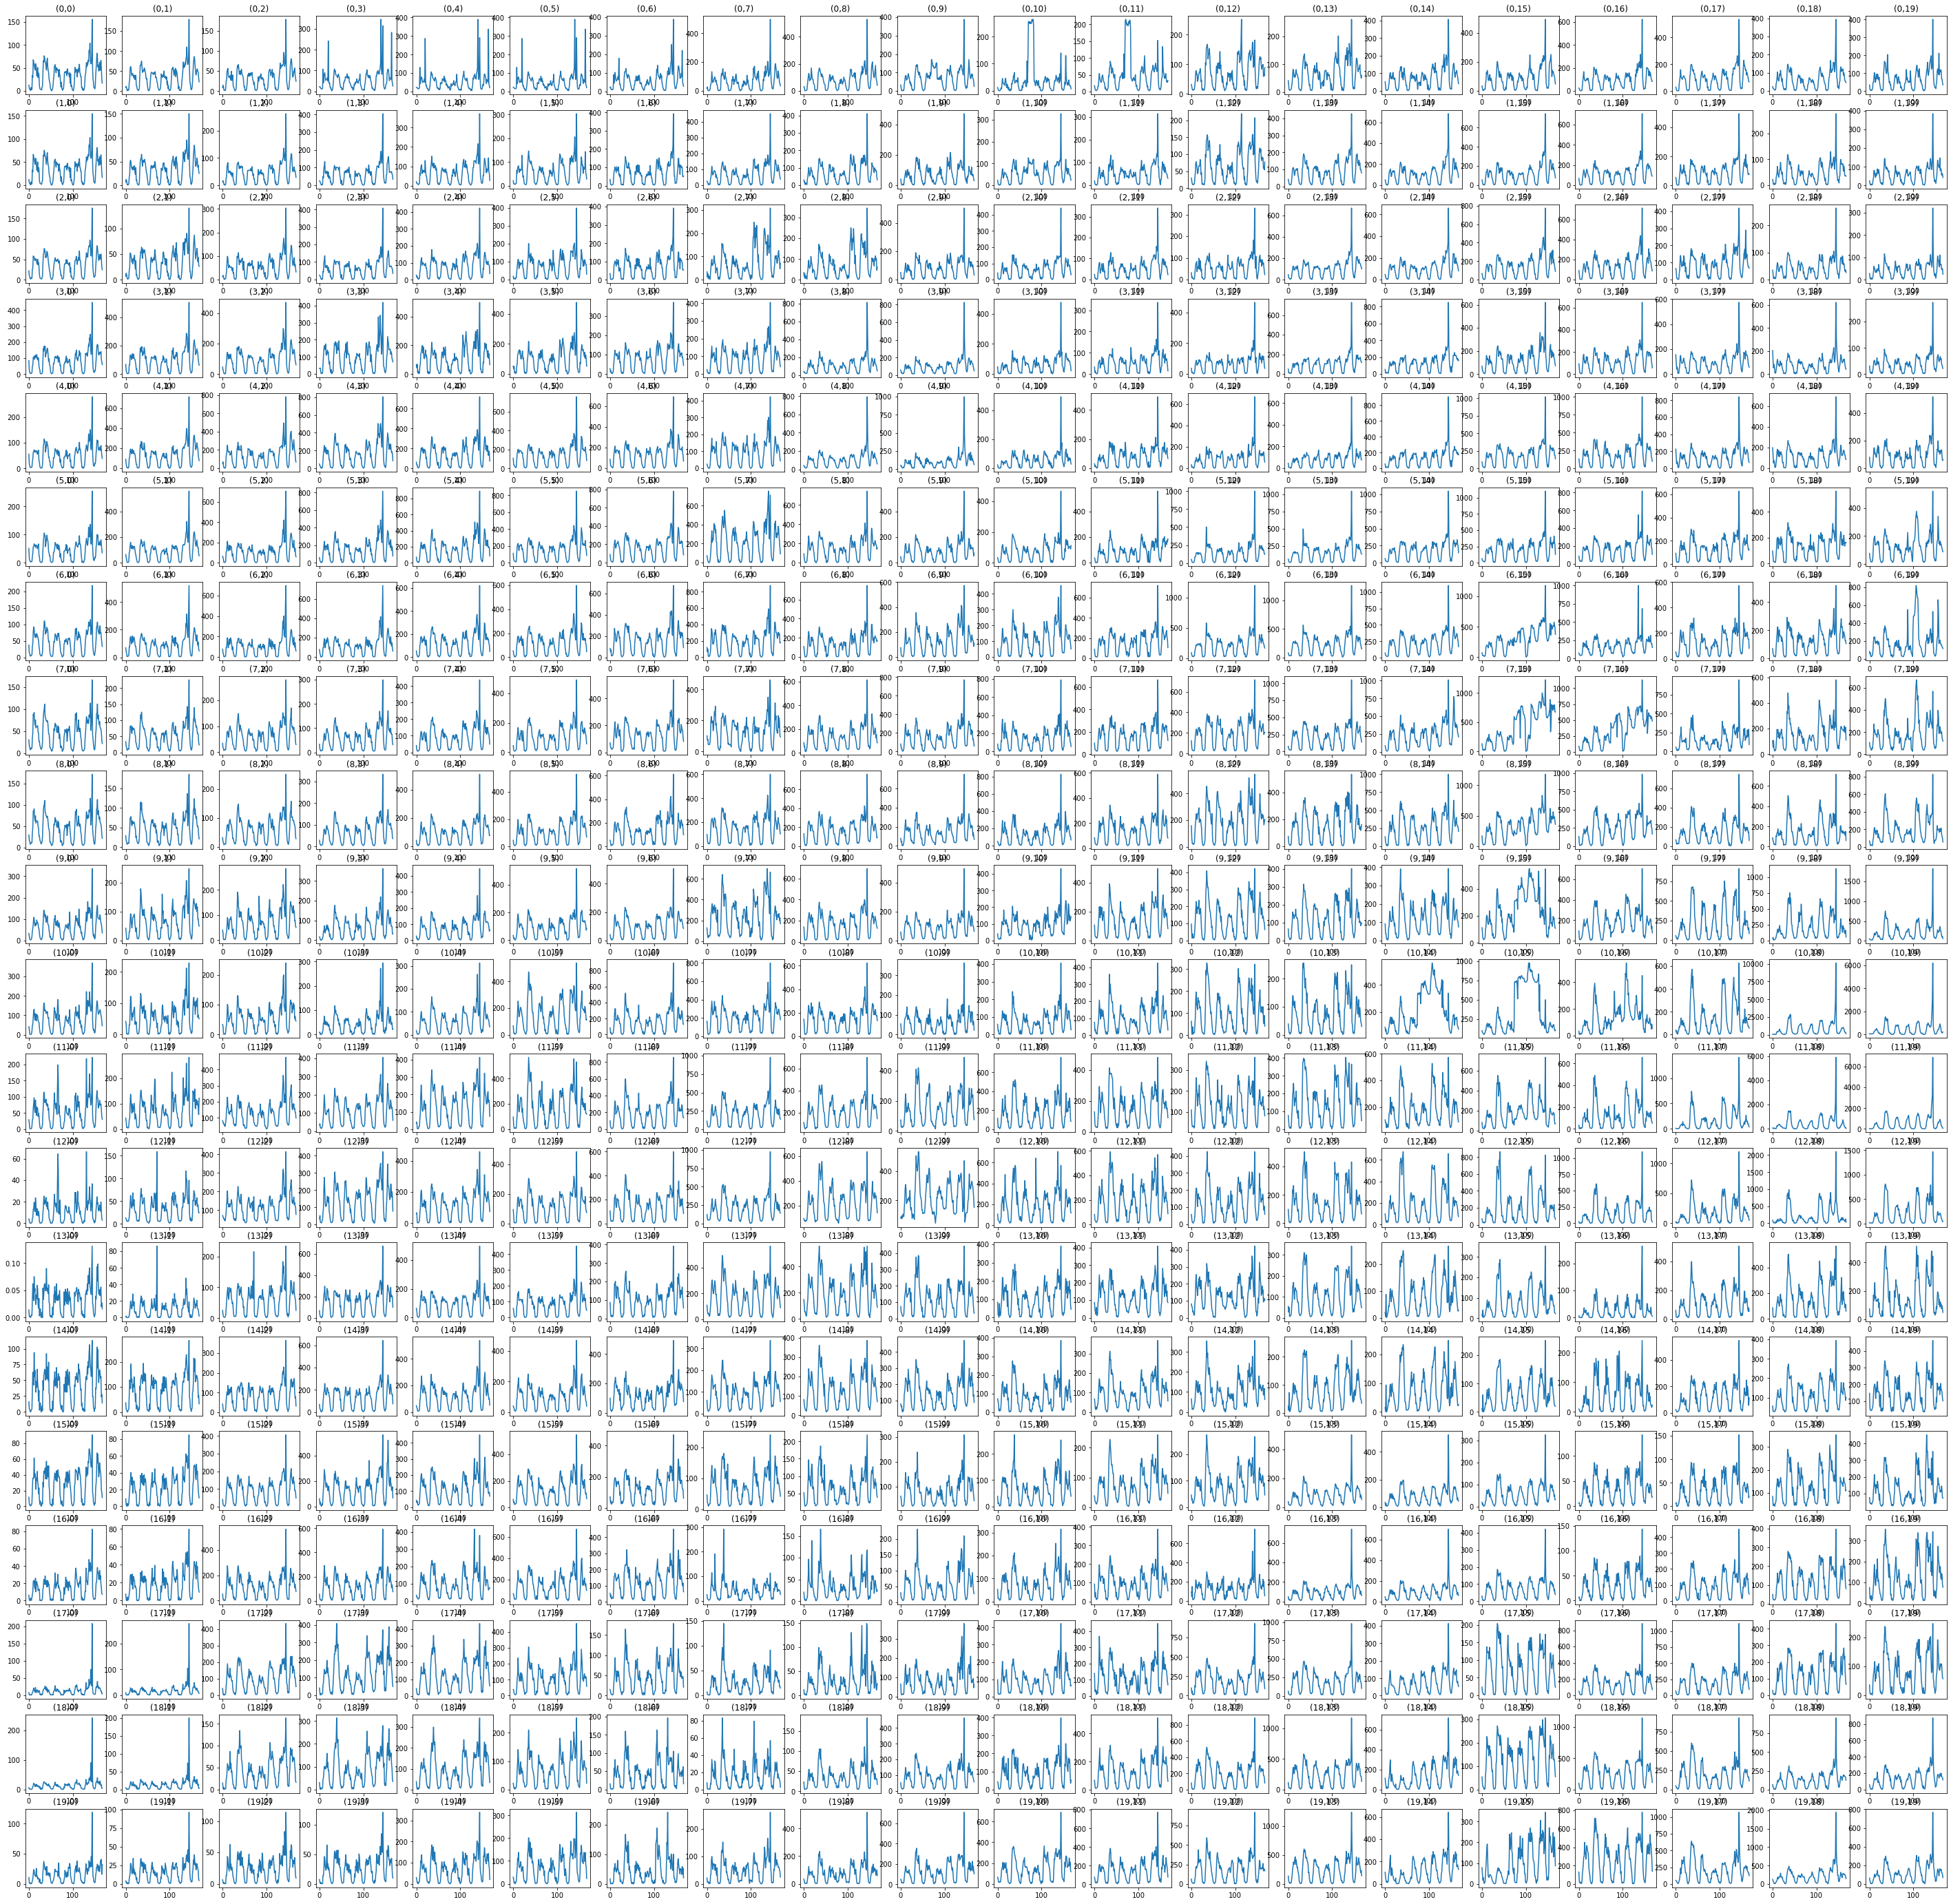

In [10]:
plt.figure(figsize=(50, 50))
for i in range(20):
    for j in range(20):
        ax = plt.subplot(20, 20, i*20+j+1)
        ax.plot(sms_milan_test[:, i, j])
        ax.title.set_text(f"({i},{j})")

In [14]:
## prepare data
call_milan = Milan(time_range='all', aggr_time='hour', tele_column='call', grid_range=None)
call_milan.prepare_data()
call_milan.setup()
call_milan_train = np.concatenate((call_milan.milan_train, call_milan.milan_val), axis=0)
call_milan_test = call_milan.milan_test
call_milan_train = call_milan_train.reshape((call_milan_train.shape[0], -1))
call_milan_test = call_milan_test.reshape((call_milan_test.shape[0], -1))
call_milan_data = np.concatenate((call_milan_train, call_milan_test), axis=0)

milan_call_all_data.csv.gz already exists in data/sms-call-internet-mi
Loading Milan data...
loaded 1488 rows and 10000 grids
train shape: (1152, 100, 100), val shape: (168, 100, 100), test shape: (168, 100, 100)


In [16]:
call_milan_test = call_milan_test.reshape(-1, 100, 100)
call_milan_train = call_milan_train.reshape(-1, 100, 100)

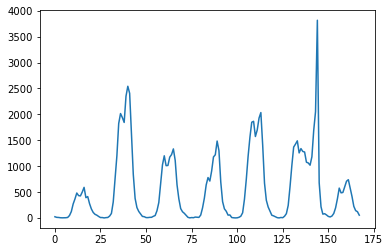

In [17]:
plt.plot(call_milan_test[:, 50, 58])

In [18]:
import h5py

In [22]:
f = h5py.File('data/data_git_version.h5', 'r')

In [23]:
list(f.keys())

['data', 'idx']

In [26]:
data = f['data']
data = np.array(data)
data = data.reshape(-1, 100, 100, 3)

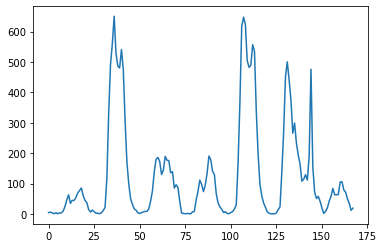

In [43]:
plt.plot(data[-168:, 51, 57, 1])